In [1]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



## Societies degree

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.model_selection import train_test_split #az adatokat ezzel válasszuk szét train és test adatokra
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #metrics for accuracy calculation

## Application of KMeans to SOCIETIES

In [3]:
df=pd.read_excel('societies_statistics.xlsx', sheet_name="database")
df.head(5)

,ID,Label,Tag,Modularity class,Degree,Weighted Degree,Eccentricity,Closness centrality,Betweeness centrality,Authority,Hub,PageRanks
0,24,Ady Endre Irodalmi Kör,t,2,6,7,5,0.387777,521.575568,0.021988,0.021993,0.000586
1,25,Ady Endre Társaság,t,6,9,9,5,0.399550,466.380118,0.027398,0.027402,0.000768
2,110,Arany János Irodalmi Kör,t,8,8,10,5,0.398952,417.794166,0.030466,0.030472,0.000726
3,111,Arany János Társaság,t,2,11,18,5,0.323030,598.557249,0.004457,0.004456,0.001091
4,252,Barabás Miklós Céh,t,0,5,5,5,0.365820,41.851852,0.013910,0.013911,0.000514


In [4]:
df.columns

Index(['ID', 'Label', 'Tag', 'Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks'],
      dtype='object')

In [5]:
d=df[['Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks']].T.to_dict()

In [6]:
X_societies=np.array([list(d[i].values()) for i in d])

In [7]:
X_societies.shape

(37, 9)

In [8]:
d=df[['ID']].T.to_dict()
y_societies=np.array([list(d[i].values()) for i in d])

In [9]:
y_societies.shape

(37, 1)

In [10]:
d=df[['Label']].T.to_dict()
y_labels=np.array([list(d[i].values()) for i in d])

In [11]:
y_labels.shape

(37, 1)

In [12]:
d=df[['Tag']].T.to_dict()
y_tags=np.array([list(d[i].values()) for i in d])

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
est = KMeans(n_clusters=5)
clusters = est.fit_predict(X_societies)
est.cluster_centers_.shape

(5, 9)

In [15]:
for i in range(5):
    print(est.cluster_centers_[i])

[6.05000000e+00 5.60000000e+00 9.95000000e+00 5.00000000e+00
 3.41123750e-01 7.88519006e+01 9.64525000e-03 9.64575000e-03
 5.40200000e-04]
[3.50000000e+00 2.20000000e+01 3.75000000e+01 5.00000000e+00
 3.93041500e-01 1.98679166e+03 3.25140000e-02 3.25175000e-02
 1.85300000e-03]
[4.25000000e+00 1.72500000e+01 2.85000000e+01 4.75000000e+00
 3.73047000e-01 9.81719864e+02 2.18747500e-02 2.18747500e-02
 1.38625000e-03]
[1.10000000e+01 3.60000000e+01 4.50000000e+01 4.00000000e+00
 3.61356000e-01 2.53738868e+03 2.42010000e-02 2.41970000e-02
 2.83400000e-03]
[5.10000000e+00 1.40000000e+01 2.25000000e+01 4.80000000e+00
 3.75324500e-01 5.74353204e+02 2.33840000e-02 2.33854000e-02
 1.15290000e-03]


In [16]:
df['clusters']=clusters

In [17]:
clusters

array([4, 4, 4, 4, 0, 4, 2, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       3, 2, 4, 2, 0, 0, 4, 2, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [18]:
df.head(3)

,ID,Label,Tag,Modularity class,Degree,Weighted Degree,Eccentricity,Closness centrality,Betweeness centrality,Authority,Hub,PageRanks,clusters
0,24,Ady Endre Irodalmi Kör,t,2,6,7,5,0.387777,521.575568,0.021988,0.021993,0.000586,4
1,25,Ady Endre Társaság,t,6,9,9,5,0.399550,466.380118,0.027398,0.027402,0.000768,4
2,110,Arany János Irodalmi Kör,t,8,8,10,5,0.398952,417.794166,0.030466,0.030472,0.000726,4


In [19]:
df.groupby('clusters').count()['Tag']

clusters
0    20
1     2
2     4
3     1
4    10
Name: Tag, dtype: int64

In [20]:
for i in df.sort_values(by='clusters')[['clusters','Label']].T.iteritems():
    print(i[1][0], i[1][1])

0 Unitárius Irodalmi Társaság
0 Károli Gáspár Irodalmi Társaság
0 József Attila Irodalmi Kör
0 Tóth Árpád Irodalmi Kör
0 Jósika Miklós Kör
0 Igaz Szó Irodalmi Köre
0 Húszak Céhe
0 Hídverők
0 Olosz Lajos Irodalmi Kör
0 Franyó Zoltán Irodalmi Kör
0 Gorkij Irodalmi Kör
0 ESZME
0 Petőfi Művelődési Társaság
0 romániai magyar Könyves Céh
0 Barabás Miklós Céh
0 Romániai Magyar Írók Szövetsége
0 Sipos Domokos Művelődési Egyesület
0 Erdélyi Könyvbarátok Társasága
0 Erdélyi Magyar Írói Rend
0 Ormós Zsigmond Közművelődési Társaság
1 Kaláka
1 Szigligeti Társaság
2 PEN Club
2 Kölcsey Egyesület
2 Műhely
2 Erdélyi Irodalmi Társaság
3 Kemény Zsigmond Társaság
4 Pázmány Péter Társaság
4 Ady Endre Irodalmi Kör
4 Gaál Gábor Kör
4 Forrás-nemzedék
4 Dumaposta
4 Arany János Társaság
4 Arany János Irodalmi Kör
4 Ady Endre Társaság
4 Koós Ferenc kör
4 Józsa Béla Athenaeum


## Application of Decision Tree to SOCIETIES

In [21]:
feature_cols = list(df.columns.values[6:])[:-1]
X_societies = df[feature_cols]

In [22]:
feature_cols

['Eccentricity',
 'Closness centrality',
 'Betweeness centrality',
 'Authority',
 'Hub',
 'PageRanks']

In [23]:
X_societies.head()

,Eccentricity,Closness centrality,Betweeness centrality,Authority,Hub,PageRanks
0,5,0.387777,521.575568,0.021988,0.021993,0.000586
1,5,0.399550,466.380118,0.027398,0.027402,0.000768
2,5,0.398952,417.794166,0.030466,0.030472,0.000726
3,5,0.323030,598.557249,0.004457,0.004456,0.001091
4,5,0.365820,41.851852,0.013910,0.013911,0.000514


In [24]:
#target vector
y = df.Degree
y

0      6
1      9
2      8
3     11
4      5
5     19
6     19
7      8
8      8
9     10
10    24
11     5
12    23
13     5
14     5
15     5
16     5
17     7
18    20
19     5
20    21
21     4
22    36
23    11
24     8
25    14
26     5
27     2
28    12
29    25
30     1
31    12
32     3
33     4
34    23
35    10
36     3
Name: Degree, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_societies, y, test_size=0.2, random_state=32)

In [26]:
classifier = DecisionTreeClassifier() #creating classifer object 

classifier = classifier.fit(X_train,y_train) #training

y_pred = classifier.predict(X_test) #predicting using the test dataset

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.125


/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


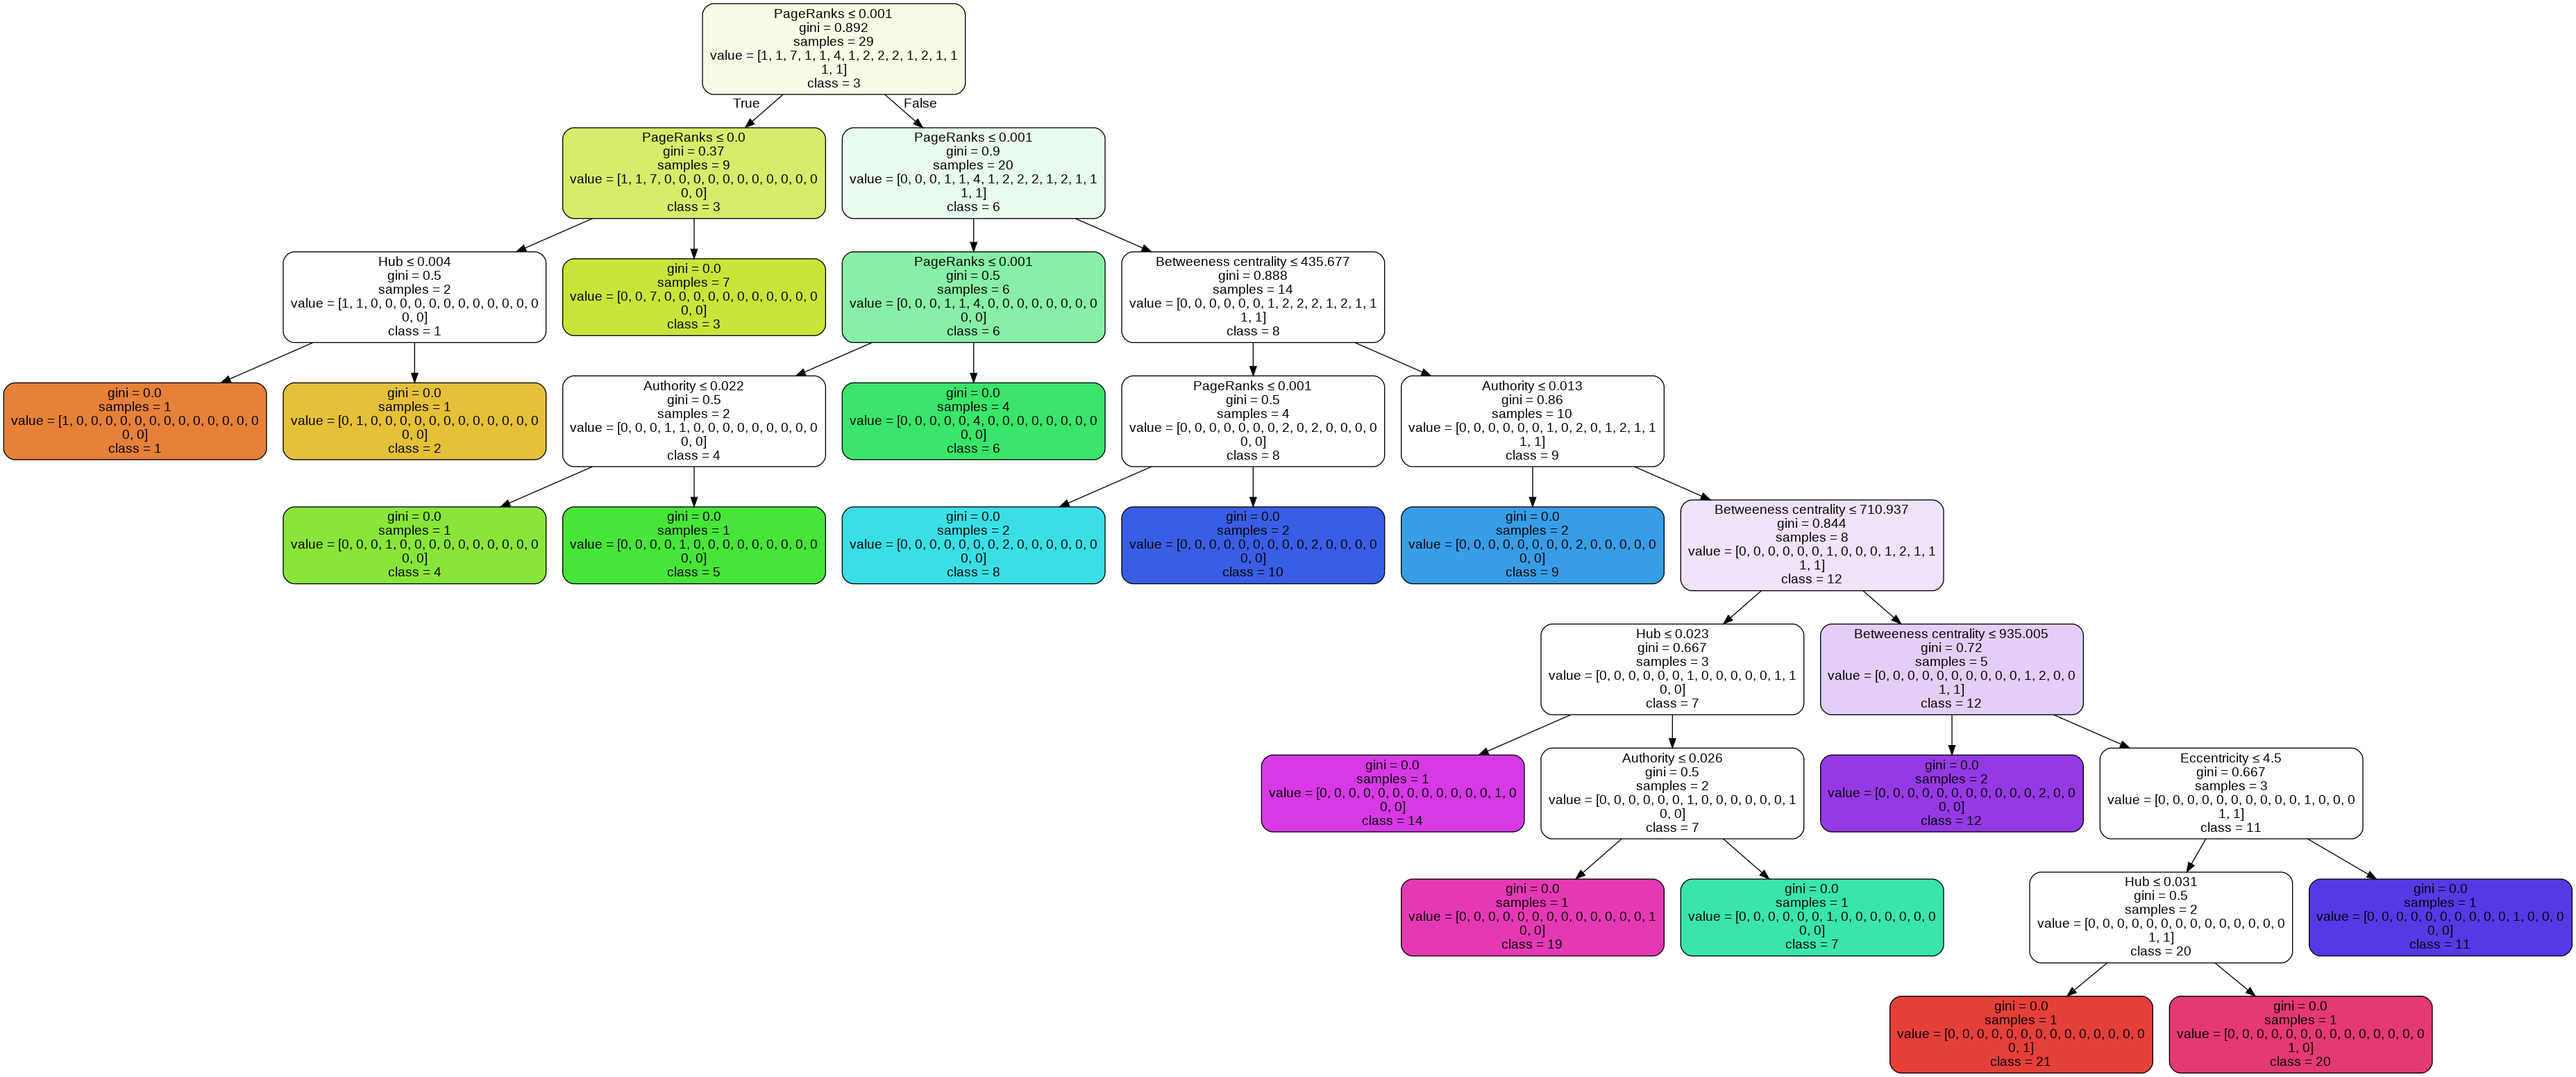

In [28]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7','8','9','10','11','12','14','19','20','21','23','24',
                                                                                  '25','36'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('societies_degree.png')
Image(graph.create_png())

In [29]:
max_depth = 3
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.125


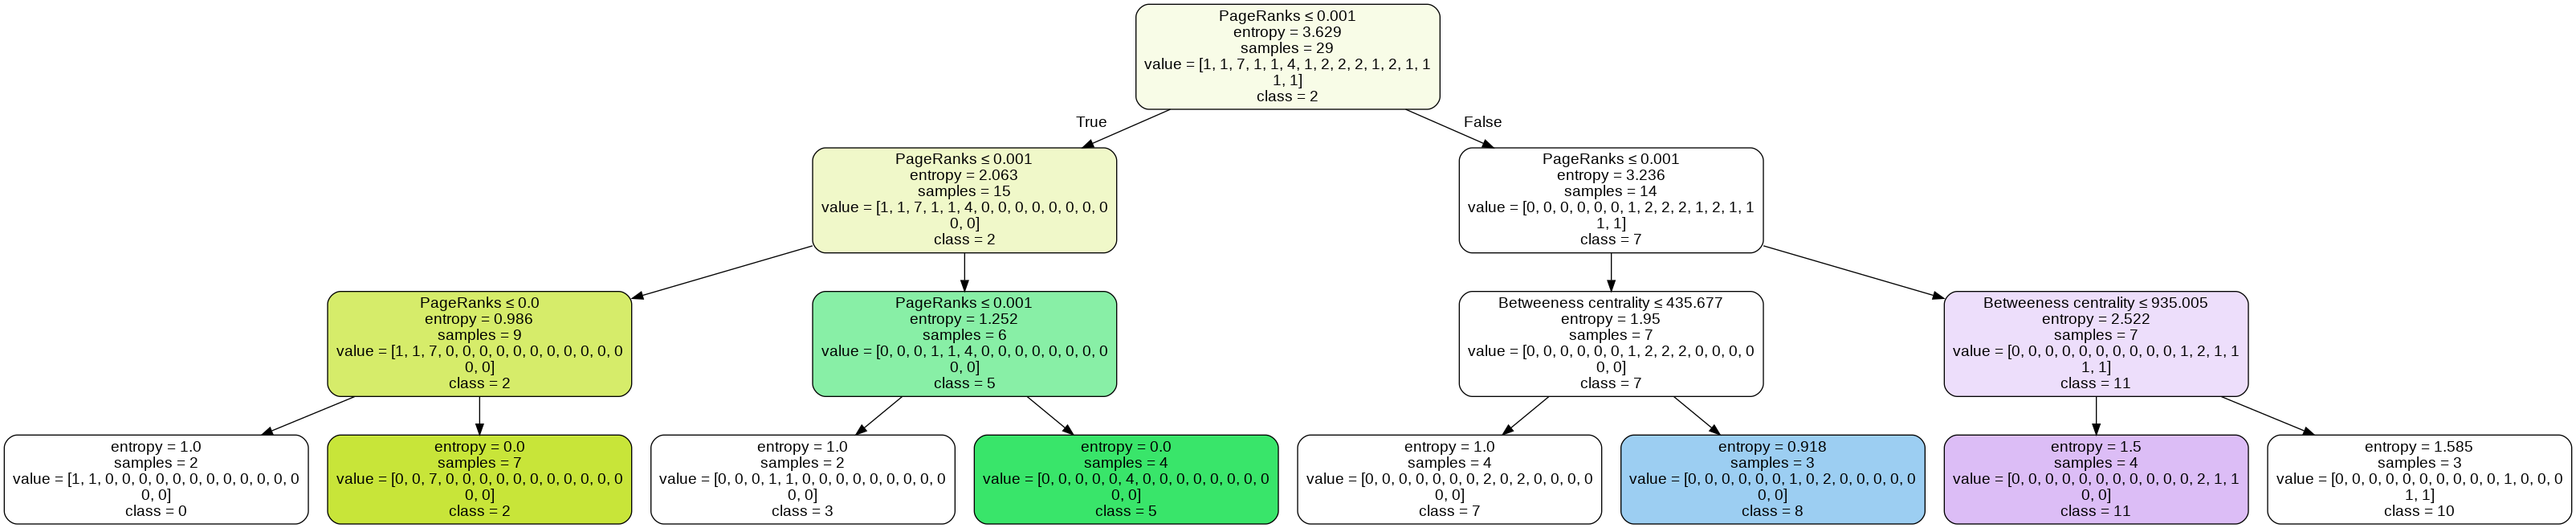

In [30]:
dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                                                                                  '18','19','20','21','22','23','24','26','27','28','30','31','33','35','36','38',
                                                                                  '39','40','42','43','44','47','50','51','55','56','63','77','79','80','83','85',
                                                                                 '92','98','132','159','165','171','222','327','331'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('societies_maxdepth' + str(max_depth) + '.png')
Image(graph.create_png())